In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import matplotlib as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym


In [2]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,387,502,589,690,745,820,1054,1054,1133,1265


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,8,9,13,18,19,23,27,28,36,39


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index=pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index=pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0)

In [20]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [21]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [22]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths, left_index=True, right_index=True, suffixes=('ConfirmedCases', 'DeathCases'))

In [23]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
2020-03-06,2,1,0,0
2020-03-07,8,6,0,0
2020-03-08,12,4,1,1
2020-03-09,12,0,1,0
2020-03-10,17,5,1,0


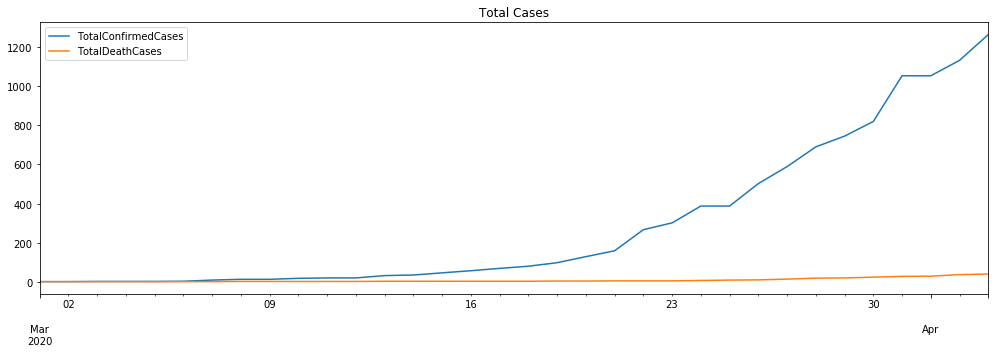

In [24]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

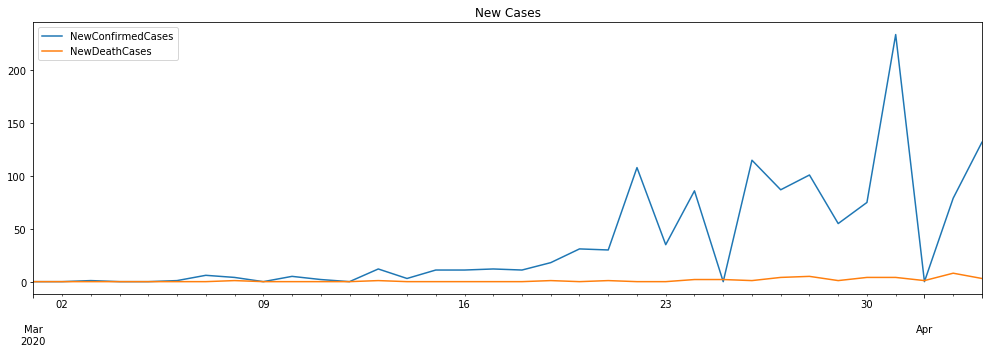

In [25]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [26]:
predicted_days = 7
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [27]:
data_argentina['num_id'] = np.arange(len(data_argentina))
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,0
2020-03-02,0,0,0,0,1
2020-03-03,1,1,0,0,2
2020-03-04,1,0,0,0,3
2020-03-05,1,0,0,0,4


In [28]:
def cuadratic_model(x, a, b, c):
    return a*x**2 + b*x +c

def cubic_model(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

def fourth_pow_model(x, a, b, c, d, e):
    return a*x**4 + b*x**3 +c*x**2 + d*x + e

def fiveth_pow_model(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f

def sixh_pow_model(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g

def exp_model(x, c, k):
    return c * np.exp(k * x)

In [29]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return formatedDate + " - " + formatedPrediction

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))

In [30]:
def plotPrediction(model, popt, x, y, plot):
    if plot:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')

        plt.pyplot.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)

    plt.pyplot.plot(x, model(x, *popt))
    plt.pyplot.plot(x, y, 'ro')

In [31]:
def predictData(model, x, y, plot = True):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y, plot)

2020-04-04 - 1330
2020-04-05 - 1440
2020-04-06 - 1553
2020-04-07 - 1671
2020-04-08 - 1793
2020-04-09 - 1919
2020-04-10 - 2049


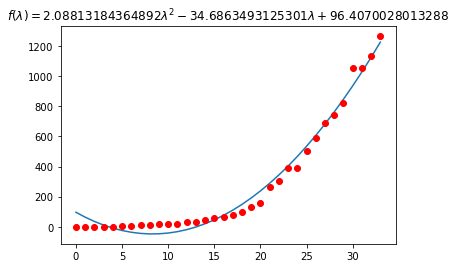

In [32]:
predictData(cuadratic_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-04-04 - 1452
2020-04-05 - 1604
2020-04-06 - 1765
2020-04-07 - 1936
2020-04-08 - 2118
2020-04-09 - 2311
2020-04-10 - 2516


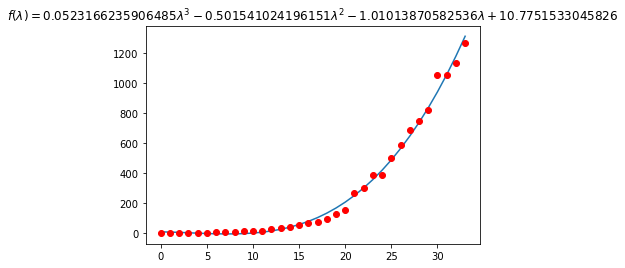

In [33]:
predictData(cubic_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-04-04 - 1390
2020-04-05 - 1506
2020-04-06 - 1623
2020-04-07 - 1740
2020-04-08 - 1856
2020-04-09 - 1971
2020-04-10 - 2084


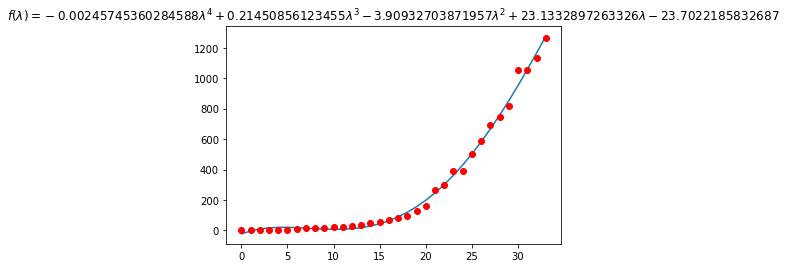

In [34]:
predictData(fourth_pow_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-04-04 - 1328
2020-04-05 - 1390
2020-04-06 - 1433
2020-04-07 - 1451
2020-04-08 - 1438
2020-04-09 - 1387
2020-04-10 - 1292


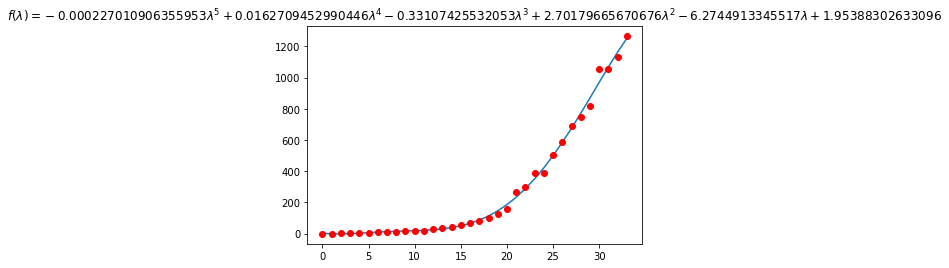

In [35]:
predictData(fiveth_pow_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-04-04 - 1335
2020-04-05 - 1405
2020-04-06 - -8036
2020-04-07 - -8000
2020-04-08 - -7987
2020-04-09 - -8003
2020-04-10 - -8050


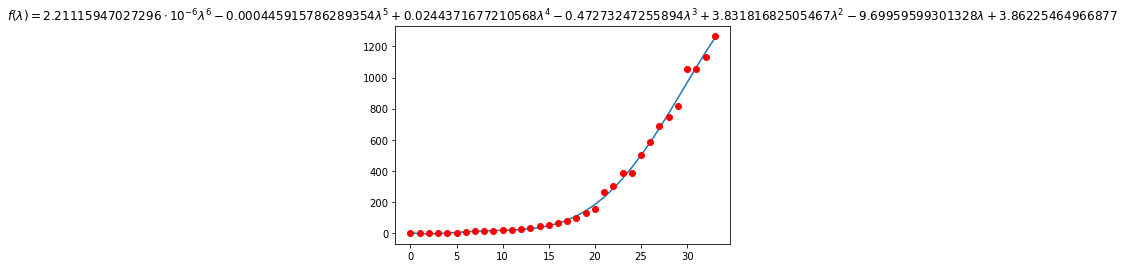

In [36]:
predictData(sixh_pow_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-04-04 - 1587
2020-04-05 - 1824
2020-04-06 - 2097
2020-04-07 - 2411
2020-04-08 - 2771
2020-04-09 - 3186
2020-04-10 - 3662


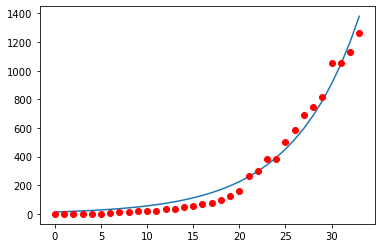

In [37]:
predictData(exp_model, data_argentina.num_id, data_argentina.TotalConfirmedCases, False)